<a href="https://colab.research.google.com/github/sharonwanjiru/NLPProject/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.filterwarnings('ignore')
import nltk
#nltk.download('all')
import string
from string import punctuation
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer


from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import spacy

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag
nltk.download('punkt')
nltk.download('stopwords')

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
exclude_list = ['but','no','because','against','not','than']
stop_words = set(stopwords.words('english'))
stop_words.difference_update(exclude_list)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [118]:
#import csv
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [119]:
data1 =  "/content/gdrive/MyDrive/PainMedicationRecommendation/drugsComTrain_raw.csv"
data2 = "/content/gdrive/MyDrive/PainMedicationRecommendation/drugsComTest_raw.csv"

In [120]:
df_train = pd.read_csv((data1))
df_test = pd.read_csv((data2))

In [121]:
print("The shape of training:",df_train.shape)
print("The shape of testing:",df_test.shape)


The shape of training: (161297, 7)
The shape of testing: (53766, 7)


In [122]:
df_data = pd.concat([df_train,df_test])
print (df_data.shape)
df_data.head()

(215063, 7)


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [123]:
df_data.columns = df_data.columns.str.lower()

In [124]:
df_data.columns

Index(['uniqueid', 'drugname', 'condition', 'review', 'rating', 'date',
       'usefulcount'],
      dtype='object')

**Data Analysis**

In [125]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueid     215063 non-null  int64 
 1   drugname     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulcount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [126]:
cat = []
num = []
for i in df_data.columns:
  if df_data[i].dtypes=='object':
    cat.append(i)
  else:
    num.append(i)
print('number of numeric variables are',len(num))
print('number of categorical cvariables are', len(cat))


number of numeric variables are 3
number of categorical cvariables are 4


In [127]:
df_data.isnull().sum()

uniqueid          0
drugname          0
condition      1194
review            0
rating            0
date              0
usefulcount       0
dtype: int64

In [128]:
print("Missing value (%):", 1200/df_data.shape[0] *100)

Missing value (%): 0.5579760349292998


In [129]:
from pandas.core import missing
percent_missing = df_data.isnull().sum()*100/ len(df_data)
missing_value_df = pd.DataFrame({'column_name': df_data.columns, 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
uniqueid,uniqueid,0.000000
drugname,drugname,0.000000
condition,condition,0.555186
review,review,0.000000
rating,rating,0.000000
date,date,0.000000
usefulcount,usefulcount,0.000000


In [130]:

print('Shape of df before dropping null values',df_data.shape)
df_data.dropna(inplace=True)
df_data.reset_index(drop=True)
print('Shape of df after dropping null values',df_data.shape)

Shape of df before dropping null values (215063, 7)
Shape of df after dropping null values (213869, 7)


Concerting date columns to required datatyppe

In [131]:
#since its not in date time format
df_data['date']=pd.to_datetime(df_data['date'])


In [132]:
df_data.nunique()

uniqueid       213869
drugname         3667
condition         916
review         128449
rating             10
date             3579
usefulcount       397
dtype: int64

In [133]:
#some conditions
df_data['condition'].value_counts().head(10)

Birth Control      38436
Depression         12164
Pain                8245
Anxiety             7812
Acne                7435
Bipolar Disorde     5604
Insomnia            4904
Weight Loss         4857
Obesity             4757
ADHD                4509
Name: condition, dtype: int64

Text(0, 0.5, 'Count')

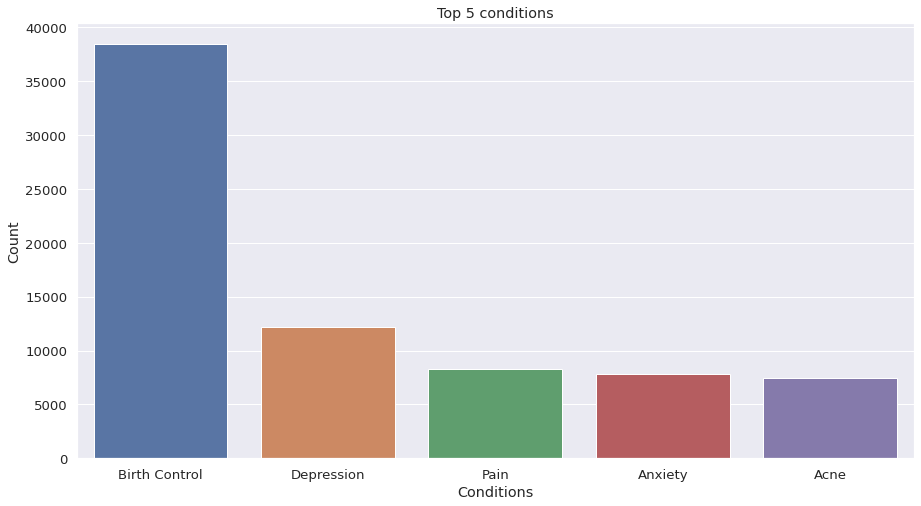

In [134]:
sns.set(font_scale=1.2, style ='darkgrid')
plt.rcParams['figure.figsize']=[15,8]

con = dict(df_data.condition.value_counts()[:5])
fig = sns.barplot(list(con.keys()),list(con.values()))
fig.set_title("Top 5 conditions")
fig.set_xlabel("Conditions")
fig.set_ylabel("Count")

In [135]:
# Top 10 drugs which got a rating of 10
df_data.loc[df_data['rating']==10]['drugname'].value_counts().head(10)

Levonorgestrel                       1883
Phentermine                          1079
Etonogestrel                          864
Varenicline                           662
Ethinyl estradiol / norethindrone     601
Escitalopram                          596
Clonazepam                            586
Alprazolam                            565
Sertraline                            550
Plan B                                527
Name: drugname, dtype: int64

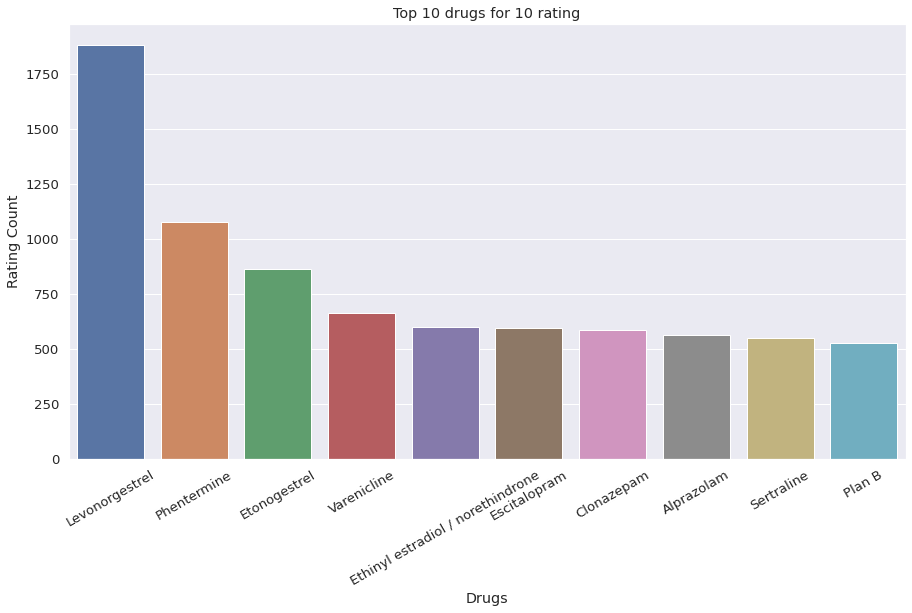

In [136]:
sns.set(font_scale=1.2, style ='darkgrid')
plt.rcParams['figure.figsize']=[15,8]


drugs= dict(df_data.loc[df_data['rating']==10]['drugname'].value_counts().head(10))
fig = sns.barplot(list(drugs.keys()),list(drugs.values()))
fig.set_title("Top 10 drugs for 10 rating")
fig.set_xlabel("Drugs")
fig.set_ylabel("Rating Count")
fig.set_xticklabels(list(drugs.keys()),rotation=30);

In [137]:
# Top 10 drugs which got a rating of 10
df_data.loc[df_data['rating']==1]['drugname'].value_counts().head(10)

Miconazole                            767
Ethinyl estradiol / norethindrone     728
Etonogestrel                          707
Levonorgestrel                        511
Nexplanon                             504
Ethinyl estradiol / norgestimate      464
Medroxyprogesterone                   443
Depo-Provera                          417
Tioconazole                           410
Ethinyl estradiol / levonorgestrel    385
Name: drugname, dtype: int64

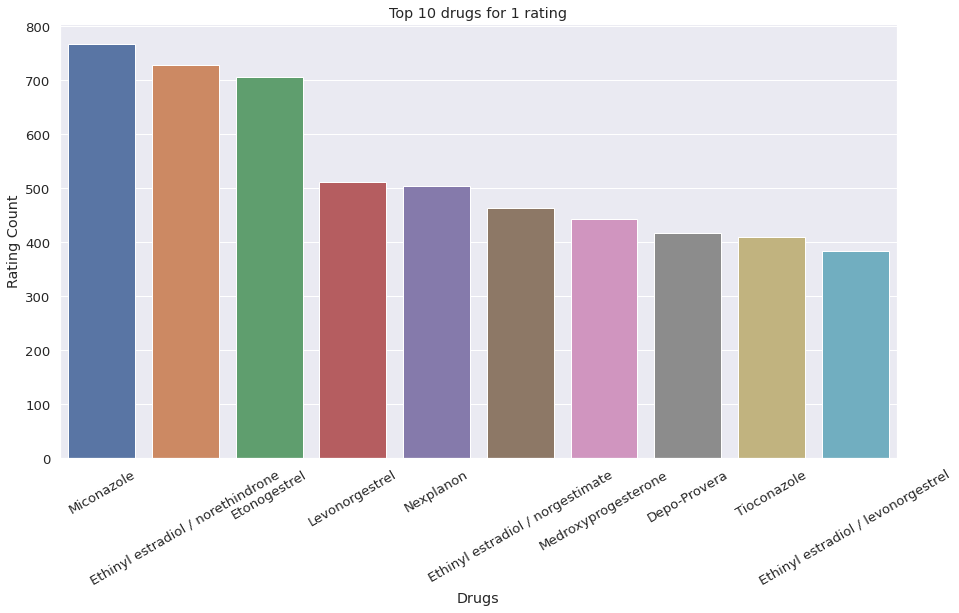

In [138]:
sns.set(font_scale=1.2, style ='darkgrid')
plt.rcParams['figure.figsize']=[15,8]


drugs= dict(df_data.loc[df_data['rating']==1]['drugname'].value_counts().head(10))
fig = sns.barplot(list(drugs.keys()),list(drugs.values()))
fig.set_title("Top 10 drugs for 1 rating")
fig.set_xlabel("Drugs")
fig.set_ylabel("Rating Count")
fig.set_xticklabels(list(drugs.keys()),rotation=30);

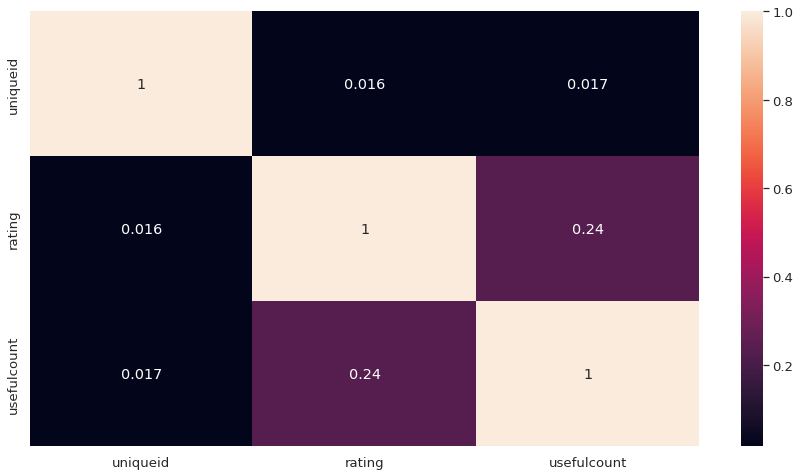

In [139]:
sns.heatmap(df_data.corr(),annot=True)

In [140]:
df_data.reset_index(drop=True,inplace=True)

(-0.5, 799.5, 499.5, -0.5)

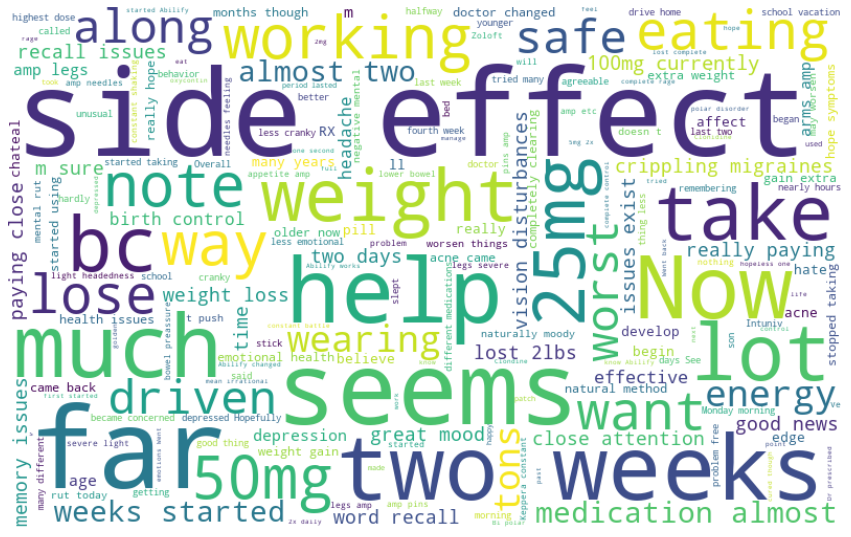

In [141]:
#word cloud for drugs with rating of 10
df_rate_ten = df_data.loc[df_data.rating, 'review']
K= (' '.join(df_rate_ten))

wordcloud = WordCloud(width=800, height=500,background_color='white').generate(K)
#wordcloud = WordCloud(width = 800, height= 500, background_color='white')..generate(k)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

(-0.5, 799.5, 499.5, -0.5)

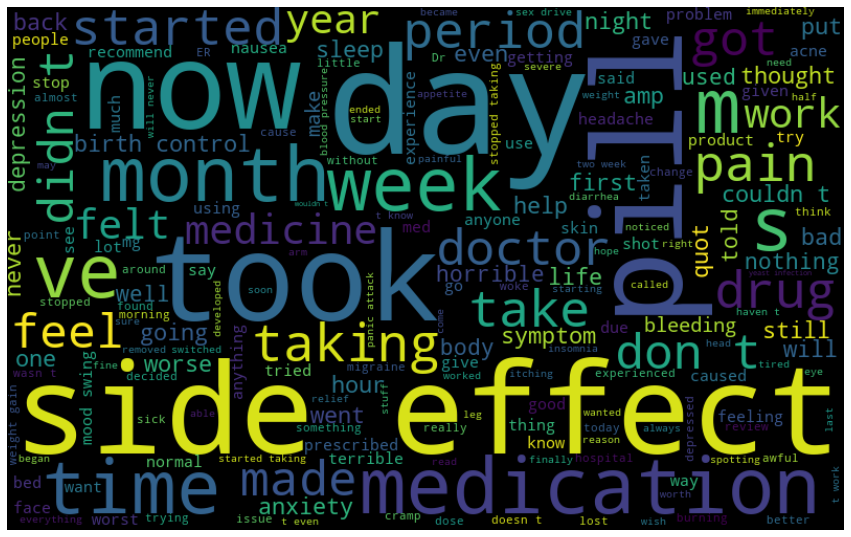

In [142]:
#word cloud for drugs with rating of 1
df_rate_one = df_data.loc[df_data.rating==1, 'review']
K1 = (' '.join(df_rate_one))

wordcloud = WordCloud(width=800, height=500).generate(K1)
#wordcloud = WordCloud(width = 800, height= 500, background_color='white'.generate(k))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

**Text PreProcessing**

In [143]:
lst = df_data['review'].tolist()
matched_list = [ele for ele in lst if '&#039' in ele]
print('No of rows with character with &#039', len(matched_list))

No of rows with character with &#039 133540


In [144]:
# converting back to apostrophe
df_data['review'] = df_data['review'].str.replace('&#039;',"'")

In [145]:
lst = df_data['review'].tolist()
matched_list = [ele for ele in lst if '&#039' in ele]
print(len(matched_list))
matched_list

0


[]

In [146]:
import re
contractions_dict = {"ain't": "are not","'s":" is","aren't": "are not"}
# finding contractions
contractions_re= re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# expanding the contractions 
def expand_contractions(s, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)

# Expanding Contractions in the reviews
df_data['review_clean']=df_data['review'].apply(expand_contractions)

In [147]:
#remove punctuation
df_data['review_clean'] = df_data['review_clean'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))

In [148]:
#lowering case
df_data['review_clean'] = df_data['review_clean'].str.lower()

In [149]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [150]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [151]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
df_data["review_clean"] = df_data["review_clean"].apply(lambda text: lemmatize_words(text))

In [152]:
def preprocess(text):
  
  #words = word_tokenize(text)
  words = word_tokenize(str(text))
  filtered_words = [word for word in words if word not in stop_words]
  final_string = " ".join(filtered_words)
  return final_string
df_data['review_clean'] = df_data['review_clean'].apply(preprocess)

Feature Engineering

In [153]:
pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [154]:
from textblob import TextBlob

In [155]:
df_data['review_clean'][100]

'ive latuda little 2 half year almost completely stopped psychotic symptom except still hear voice mainly try go sleep but no delusion paranoia drug take cogentin combination because cause shake lot main side effect experience include anhedonia shakiness jaw clenching inability sit still however im happy because actually work antipsychotic med tried not doesnt cause endless hunger experienced drug like saphris haldol zyprexa risperdal noted max daily dose 160mg'

In [156]:
text_blob_object = TextBlob(df_data['review'][100])
print(text_blob_object.sentiment)

Sentiment(polarity=0.07743055555555556, subjectivity=0.48819444444444454)


In [157]:
# Separating the day, month and year from the Date
df_data['day'] = df_data['date'].dt.day
df_data['month'] = df_data['date'].dt.month
df_data['year'] = df_data['date'].dt.year

In [158]:
# def sentiment(text):
#     try:
#         return TextBlob(text).sentiment
#     except:
#         return None

# df_data['sentiment_review'] = df_data['review'].apply(sentiment)

In [159]:
#from nltk.corpus.reader.reviews import Review
def find_pol(te):
    return TextBlob(te).sentiment.polarity

df_data['sentiment'] = df_data['review'].apply(find_pol)
df_data['sentiment_processed'] = df_data['review_clean'].apply(find_pol)

#df_data.head()

In [160]:
df_data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount,review_clean,day,month,year,sentiment,sentiment_processed
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,ha no side effect take combination bystolic 5 ...,20,5,2012,0.000000,0.000000
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,son halfway fourth week intuniv became concern...,27,4,2010,0.168333,0.188021
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,used take another oral contraceptive 21 pill c...,14,12,2009,0.067210,0.113636
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,first time using form birth control im glad we...,3,11,2015,0.179545,0.262500
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,suboxone ha completely turned life around feel...,27,11,2016,0.194444,0.163333


In [161]:
# # sentiment polarity
# def sentiment(te):
#   pol=[]
#   for i in df_data['review'].values:
#     analysis = TextBlob(i)
#     pol.append(analysis.sentiment.polarity)
#   return pol

#  # df_data['sentiment'] = df_data['review'].apply(sentiment) 
#   df_data['sentiment_processed'] = sentiment(df_data['review_clean'])
#   df_data['polarity'] = df_data['review'].apply(sentiment)
#   df_data['polarity2'] = df_data['review_clean'].apply(sentiment)
#   #df_data['polarity']= pol

In [162]:
np.corrcoef(df_data['sentiment'] ,df_data['rating'])

array([[1.       , 0.3483115],
       [0.3483115, 1.       ]])

In [163]:
np.corrcoef(df_data['sentiment_processed'],df_data['rating'])

array([[1.        , 0.35502465],
       [0.35502465, 1.        ]])

No much diff between in correlation btwn rating-review and rating-cleaned review- no important data lost

In [165]:
df_data['review'].iloc(0)

In [166]:
df_data['review_clean'].iloc[0]

'ha no side effect take combination bystolic 5 mg fish oil'

In [167]:
#word count
df_data['word_count'] = df_data["review_clean"].apply(lambda x: len(str(x).split()))

#unique word count
df_data['unique_word_count']=df_data["review_clean"].apply(lambda x: len(str(x).split()))

#puntuation count
df_data['punctuation_count']=df_data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#uppercase words count
df_data['upper_word_count']=df_data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title_case count
df_data['title_word_count']=df_data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#No of stopwrods
df_data['stopword_count']=df_data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#mean length of the words
#df_data["mean_word_len"] = df_data["review_clean"].apply(lambda x: np.mean(len(w) for w in str(x).split ))

#df_data['mean_word_len'] = df_data["mean_word_len"].fillna(0)


In [168]:
#mean length of the words
df_data["mean_word_len"] = df_data["review_clean"].apply(lambda x: np.mean([len(w) for w in str(x).split()] ))

In [169]:
df_data["mean_word_len"]=df_data['mean_word_len'].fillna(0)

In [170]:
label_encoder_drug = LabelEncoder()
label_encoder_condition = LabelEncoder()
df_data['drugname']=label_encoder_drug.fit_transform(df_data['drugname'])
df_data['condition']=label_encoder_condition.fit_transform(df_data['condition'])

In [171]:
df_data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount,review_clean,day,month,year,sentiment,sentiment_processed,word_count,unique_word_count,punctuation_count,upper_word_count,title_word_count,stopword_count,mean_word_len
0,206461,3421,480,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,ha no side effect take combination bystolic 5 ...,20,5,2012,0.000000,0.000000,11,11,3,1,6,6,4.272727
1,95260,1536,80,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,son halfway fourth week intuniv became concern...,27,4,2010,0.168333,0.188021,68,68,23,2,13,68,5.338235
2,92703,1983,175,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,used take another oral contraceptive 21 pill c...,14,12,2009,0.067210,0.113636,78,78,30,6,15,57,5.166667
3,138000,2446,175,"""This is my first time using any form of birth...",8,2015-11-03,10,first time using form birth control im glad we...,3,11,2015,0.179545,0.262500,45,45,13,4,9,43,4.711111
4,35696,553,593,"""Suboxone has completely turned my life around...",9,2016-11-27,37,suboxone ha completely turned life around feel...,27,11,2016,0.194444,0.163333,63,63,20,7,15,61,6.111111


In [172]:
np.corrcoef(df_data['sentiment_processed'],df_data['rating'])

array([[1.        , 0.35502465],
       [0.35502465, 1.        ]])

In [173]:
#Giving sentiments according ratings
df_data['sentiment_rate'] = df_data['rating'].apply(lambda x: 1 if x > 5 else 0)

In [174]:
df_data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount,review_clean,day,month,...,sentiment,sentiment_processed,word_count,unique_word_count,punctuation_count,upper_word_count,title_word_count,stopword_count,mean_word_len,sentiment_rate
0,206461,3421,480,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,ha no side effect take combination bystolic 5 ...,20,5,...,0.000000,0.000000,11,11,3,1,6,6,4.272727,1
1,95260,1536,80,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,son halfway fourth week intuniv became concern...,27,4,...,0.168333,0.188021,68,68,23,2,13,68,5.338235,1
2,92703,1983,175,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,used take another oral contraceptive 21 pill c...,14,12,...,0.067210,0.113636,78,78,30,6,15,57,5.166667,0
3,138000,2446,175,"""This is my first time using any form of birth...",8,2015-11-03,10,first time using form birth control im glad we...,3,11,...,0.179545,0.262500,45,45,13,4,9,43,4.711111,1
4,35696,553,593,"""Suboxone has completely turned my life around...",9,2016-11-27,37,suboxone ha completely turned life around feel...,27,11,...,0.194444,0.163333,63,63,20,7,15,61,6.111111,1


Using all features to model

In [175]:
X_train = df_data[df_data['uniqueid'].isin(df_train['uniqueID'])].filter(['condition','year','day','month','usefulcount','sentiment','sentiment_processed','word_count','unique_word_count','punctuation_count','upper_word_count','title_word_count','stopword_count','mean_word_len'])
X_test = df_data[df_data['uniqueid'].isin(df_test['uniqueID'])].filter(['condition','year','day','month','usefulcount','sentiment','sentiment_processed','word_count','unique_word_count','punctuation_count','upper_word_count','title_word_count','stopword_count','mean_word_len'])

y_train = df_data[df_data['uniqueid'].isin(df_train['uniqueID'])]['sentiment_rate']
y_test = df_data[df_data['uniqueid'].isin(df_test['uniqueID'])]['sentiment_rate']

In [ ]:
#  #Defining Features and splitting the data as train and test set

# features = df_data[['condition', 'usefulcount', 'sentiment', 'day', 'month', 'year',
#                    'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
#                    'count_punctuations', 'count_words_upper', 'count_words_title',
#                    'count_stopwords', 'mean_word_len']]

# target = df_data['sentiment_rate']

# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)
# print ("The Train set size ", X_train.shape)
# print ("The Test set size ", X_test.shape)

In [176]:
X_train.columns

Index(['condition', 'year', 'day', 'month', 'usefulcount', 'sentiment',
       'sentiment_processed', 'word_count', 'unique_word_count',
       'punctuation_count', 'upper_word_count', 'title_word_count',
       'stopword_count', 'mean_word_len'],
      dtype='object')

In [182]:

clf = LGBMClassifier(
    
    n_estimators=10000,
    learning_rate=0.50,
    num_leaves=63,
    subsample=.9,
    max_depth=7,
    reg_alpha=.1,
    reg_lambda=.1,
    min_split_gain=.01,
    min_child_weight=2,
    verbose =-1,
    num_iterations=1500

)

model = clf.fit(X_train, y_train)

 #predictions
predictions_ml = model.predict(X_test)
print("The accuracy of the model is ", accuracy_score(y_test,predictions_ml), '\n')
print ("The confusion matrix is \n")
print( confusion_matrix(y_test, predictions_ml),  '\n ')

print (classification_report(y_test,predictions_ml))

The accuracy of the model is  0.8916047951225898 

The confusion matrix is 

[[12804  3315]
 [ 2481 34871]] 
 
              precision    recall  f1-score   support

           0       0.84      0.79      0.82     16119
           1       0.91      0.93      0.92     37352

    accuracy                           0.89     53471
   macro avg       0.88      0.86      0.87     53471
weighted avg       0.89      0.89      0.89     53471



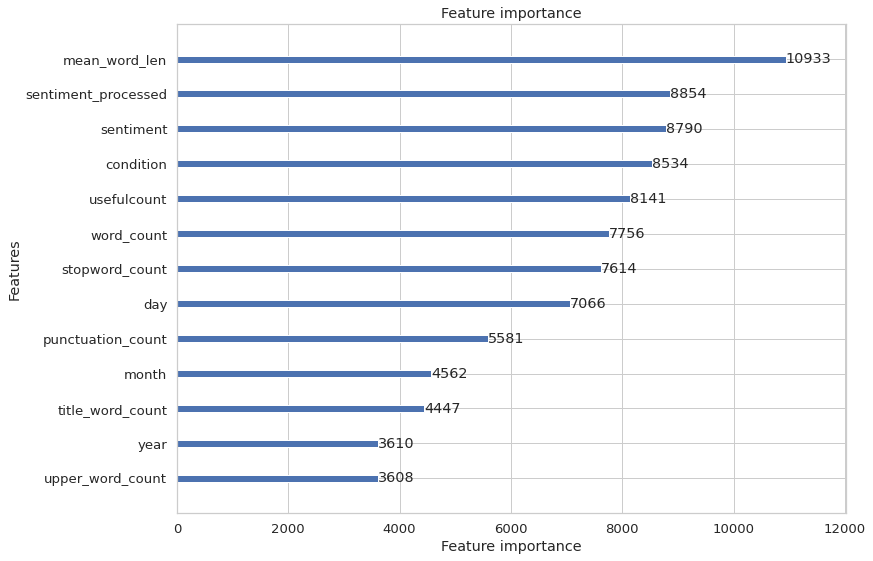

In [183]:
# Feature Importance Plot using LGBM
plt.rcParams['figure.figsize'] = [12, 9]
sns.set(style = 'whitegrid', font_scale = 1.2)
plot_importance(model);

In [194]:
xgb_clf = XGBClassifier(n_estimator= 10000,
                         learning_rate =0.50,
                        num_leaves=63,
                        subsample=.9,
                        max_depth=7,
                        reg_alpha=.1,
                        reg_lambda=.1,
                        min_split_gain=.01,
                        min_child_weight=2,
                        verbose =-1,
                        num_iterations=500
                        )

model_xgb = xgb_clf.fit(X_train,y_train)

#predictions
predictions_xgb = model_xgb.predict(X_test)
print("The accuracy is : " ,  accuracy_score(y_test,predictions_xgb), '\n')
print ("The confusion matrix is \n")
print( confusion_matrix(y_test, predictions_xgb),  '\n ')

print (classification_report(y_test,predictions_xgb))

The accuracy is :  0.7860522526229171 

The confusion matrix is 

[[ 8418  7701]
 [ 3739 33613]] 
 
              precision    recall  f1-score   support

           0       0.69      0.52      0.60     16119
           1       0.81      0.90      0.85     37352

    accuracy                           0.79     53471
   macro avg       0.75      0.71      0.72     53471
weighted avg       0.78      0.79      0.78     53471



LR: 0.708606 (0.002608)
[[ 1216 14903]
 [  797 36555]] 

              precision    recall  f1-score   support

           0       0.60      0.08      0.13     16119
           1       0.71      0.98      0.82     37352

    accuracy                           0.71     53471
   macro avg       0.66      0.53      0.48     53471
weighted avg       0.68      0.71      0.62     53471

LDA: 0.746001 (0.001321)
[[ 4559 11560]
 [ 2262 35090]] 

              precision    recall  f1-score   support

           0       0.67      0.28      0.40     16119
           1       0.75      0.94      0.84     37352

    accuracy                           0.74     53471
   macro avg       0.71      0.61      0.62     53471
weighted avg       0.73      0.74      0.70     53471

KNN: 0.709697 (0.001332)
[[ 7231  8888]
 [ 5870 31482]] 

              precision    recall  f1-score   support

           0       0.55      0.45      0.49     16119
           1       0.78      0.84      0.81     37352

    accur

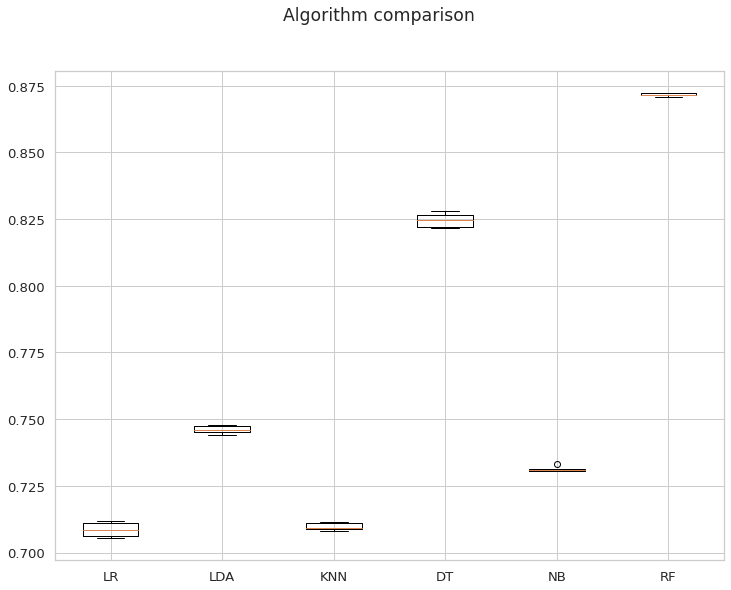

In [196]:
models= []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))

#evaluating each model
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  cv_results = model_selection.cross_val_score(model, X_train, y_train, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(),cv_results.std())
  print(msg)
  m = model.fit(X_train,y_train)
  predictions_3 = m.predict(X_test)
  print(confusion_matrix(y_test,predictions_3), '\n')
  print(classification_report(y_test, predictions_3))
  #box plot algorithm comparison
fig= plt.figure()
fig.suptitle("Algorithm comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [197]:
models= []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))

#evaluating each model
results = []
names = []
scoring = 'accuracy'
for name, model_xgb in models:
  cv_results = model_selection.cross_val_score(model, X_train, y_train, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(),cv_results.std())
  print(msg)
  m = model_xgb.fit(X_train,y_train)
  predictions_4 = m.predict(X_test)
  print(confusion_matrix(y_test,predictions_4), '\n')
  print(classification_report(y_test, predictions_4))
  #box plot algorithm comparison
fig= plt.figure()
fig.suptitle("Algorithm comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR: 0.871732 (0.000990)
[[ 1216 14903]
 [  797 36555]] 

              precision    recall  f1-score   support

           0       0.60      0.08      0.13     16119
           1       0.71      0.98      0.82     37352

    accuracy                           0.71     53471
   macro avg       0.66      0.53      0.48     53471
weighted avg       0.68      0.71      0.62     53471



KeyboardInterrupt: ignored

**n_gram model building on review**

In [ ]:
df_data.review_clean

In [ ]:
X_train_features = df_data[df_data['uniqueid'].isin(df_train['uniqueID'])].filter(['review_clean'])
X_test_features = df_data[df_data['uniqueid'].isin(df_test['uniqueID'])].filter(['review_clean'])

y_train_ngram = df_data[df_data['uniqueid'].isin(df_train['uniqueID'])].filter(['sentiment_rate'])
y_test_ngram = df_data[df_data['uniqueid'].isin(df_test['uniqueID'])].filter(['sentiment_rate'])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer = 'word',
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             min_df = 2,
                             ngram_range= (1,3),
                             max_features = 14 
                            )
vectorizer

In [ ]:
%time X_train_ngram = vectorizer.fit_transform(X_train_features['review_clean']).astype(float)
%time X_test_ngram = vectorizer.fit_transform(X_test_features['review_clean']).astype(float)
#%time X_test_ngram = vectorizer.fit.transform(X_test_features['review_clean']).astype(float)


In [ ]:
# y_train = df_data[df_data['uniqueid'].isin(df_train['uniqueID'])]['sentiment_rate']
# y_test = df_data[df_data['uniqueid'].isin(df_test['uniqueID'])]['sentiment_rate']

In [ ]:
X_test_features.columns

In [ ]:

clf = LGBMClassifier(
    n_estimators=10000,
    learning_rate=0.3,
    num_leaves=200,
    subsample=.9,
    max_depth=7,
    reg_alpha=.1,
    reg_lambda=.1,
    min_split_gain=.01,
    min_child_weight=2,
    silent=1,
    verbose =-1,
    num_iterations=150

)

predictions_ngrams =  clf.fit(  X_train_ngram, y_train_ngram)

#predictions
predictions_ngrams = model.predict(X_test_ngram)
print("The accuracy of the model is ", accuracy_score(y_test_ngram,predictions_ngrams), '\n')
print ("The confusion matrix is \n")
print( confusion_matrix(y_test_ngram, predictions_ngrams),  '\n ')

print (classification_report(y_test_ngram,predictions_ngrams))

In [201]:
X_test['ml_pred']= predictions_ml
X_test['xgb_pred'] = predictions_xgb

Saving Models

In [198]:
import pickle

with open ('light.pkl','wb') as f:
  pickle.dump(predictions_ml,f)

In [ ]:
import pickle

with open ('ngram.pkl','wb') as f:
  pickle.dump(predictions_ngrams,f)

In [199]:
import pickle

with open ('xgb.pkl','wb') as f:
  pickle.dump(predictions_xgb,f)

Combining results from the models

In [202]:
X_test['final_pred']= (X_test['ml_pred']+X_test['xgb_pred'])/2*X_test['usefulcount']

In [203]:
X_test.columns

Index(['condition', 'year', 'day', 'month', 'usefulcount', 'sentiment',
       'sentiment_processed', 'word_count', 'unique_word_count',
       'punctuation_count', 'upper_word_count', 'title_word_count',
       'stopword_count', 'mean_word_len', 'ml_pred', 'xgb_pred', 'final_pred'],
      dtype='object')

In [204]:
X_test['drugname'] = df_data[df_data['uniqueid'].isin(df_test['uniqueID'])].drugname


In [205]:
drug_labels = X_test['drugname'].tolist()
condition_labels = X_test['condition'].tolist()
X_test.drugname = list(label_encoder_drug.inverse_transform(drug_labels))
X_test.condition = label_encoder_condition.inverse_transform(condition_labels)

In [206]:
X_test.head()

,condition,year,day,month,usefulcount,sentiment,sentiment_processed,word_count,unique_word_count,punctuation_count,upper_word_count,title_word_count,stopword_count,mean_word_len,ml_pred,xgb_pred,final_pred,drugname
160398,Depression,2012,28,2,22,0.000000,-0.300000,44,44,18,2,4,24,6.227273,0,0,0.0,Mirtazapine
160399,"Crohn's Disease, Maintenance",2009,17,5,17,0.566667,0.483333,31,31,9,0,4,20,4.548387,1,1,17.0,Mesalamine
160400,Urinary Tract Infection,2017,29,9,3,0.333333,0.333333,3,3,2,0,1,1,7.000000,1,1,3.0,Bactrim
160401,Weight Loss,2017,5,3,35,0.139063,0.253125,71,71,30,10,14,72,5.436620,1,1,35.0,Contrave
160402,Birth Control,2015,22,10,4,0.260926,0.244216,77,77,13,10,17,75,5.025974,1,1,4.0,Cyclafem 1 / 35


Drug name prediction

In [207]:
#con = input('enter a condition')
X_test.groupby('condition').get_group('Pain').sort_values('final_pred',ascending = False).drop_duplicates('drugname',keep='first').head(10)

,condition,year,day,month,usefulcount,sentiment,sentiment_processed,word_count,unique_word_count,punctuation_count,upper_word_count,title_word_count,stopword_count,mean_word_len,ml_pred,xgb_pred,final_pred,drugname
185443,Pain,2008,15,4,695,0.102273,0.097273,44,44,37,1,9,36,6.000000,1,1,695.0,Oxycodone
165471,Pain,2008,15,4,695,0.102273,0.097273,44,44,37,1,9,36,6.000000,1,1,695.0,OxyContin
164988,Pain,2010,21,5,308,0.009722,0.039706,82,82,26,9,11,52,5.195122,1,1,308.0,Elavil
170545,Pain,2008,13,5,285,0.039689,0.058712,52,52,11,2,9,37,5.576923,1,1,285.0,Tramadol
195893,Pain,2013,13,9,273,0.031190,0.080000,44,44,22,2,5,30,6.022727,1,1,273.0,Amitriptyline
197816,Pain,2014,21,8,266,0.058036,0.001786,40,40,9,4,4,19,5.000000,1,1,266.0,Gabapentin
182846,Pain,2008,10,7,262,0.012500,0.012500,21,21,5,2,4,18,4.809524,1,1,262.0,Neurontin
189549,Pain,2009,27,10,256,0.265476,0.226389,75,75,22,14,19,89,4.320000,1,1,256.0,Acetaminophen / hydrocodone
180380,Pain,2009,8,7,221,-0.263750,-0.454688,66,66,16,16,19,66,5.378788,1,1,221.0,Ultram
169207,Pain,2008,12,9,196,0.067500,0.011250,63,63,15,9,17,37,5.587302,1,1,196.0,Percocet


In [208]:
from ipywidgets import interact

In [211]:
# lets find the Highest and Lowest Rated Drugs for each Condition

@interact
def high_low_rate(condition = list(X_test['condition'].value_counts().index)):
    print("\n Top 5 Drugs")
    print(X_test[X_test['condition'] == condition][['drugname','final_pred']].sort_values(by = 'final_pred',
                                                 ascending = False).head().reset_index(drop = True))
    print("\n\n Bottom 5 Drugs")
    print(X_test[X_test['condition'] == condition][['drugname','final_pred','ml_pred']].sort_values(by = 'final_pred',
                                                 ascending = True).head().reset_index(drop = True))

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…

Deploying Using FASTAPI nd NGROK

In [210]:
!pip install fastapi
!pip install uvicorn
!pip install pickle5
!pip install pydantic
!pip install scikit-learn
!pip install requests
!pip install pypi-json
!pip install pyngrok
!pip install nest-asyncio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [212]:
from fastapi import FastAPI
from pydantic import BaseModel
import pickle
import json
import uvicorn
from pyngrok import ngrok
from fastapi.middleware.cors import CORSMiddleware
import nest_asyncio

In [213]:
app = FastAPI()

In [214]:
origins = ["*"]

app.add_middleware(
    CORSMiddleware,
    allow_origins=origins,
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

In [ ]:

# @app.get('/condition/{condition}')
# def get_condition_data(condition: str):
#     # Filter the rows in the dataframe based on the condition
#     df_filtered = X_test[X_test['condition'] == condition]
    
#     # Get the top 5 drugs
#     drugs = df_filtered['drugname'].head(5).tolist()
    
#     # Get the final score
#     score = df_filtered['final_pred']
    
#     return {'drugname': drugs, 'final_pred': score}

In [ ]:
# @app.get('/condition/{condition}')
# def get_condition_data(condition: str):
#     # Filter the rows in the dataframe based on the condition
#     df_filtered = X_test[X_test['condition'] == condition]
    
#     # Group the data by condition and sort the groups by final_pred in descending order
#     df_grouped = df_filtered.groupby('condition').apply(lambda x: x.sort_values(by='final_pred', ascending=False)).reset_index(drop=True)
    

#     # Get the top 5 rows
#     top_5 = df_grouped.head(5)
    
#     # Get the top 5 conditions
#     conditions = top_5['condition'].tolist()
    
#     # Get the final score
#     score = top_5['final_pred']
    
#     return {'condition': conditions, 'final_pred': score}

In [215]:
@app.get('/condition/{condition}')
def get_condition_data(condition: str):
    # Filter the rows in the dataframe based on the condition
    df_filtered = X_test[X_test['condition'] == condition]
    
    # Sort the dataframe by final_pred in descending order
    df_sorted = df_filtered.sort_values(by='final_pred', ascending=False)
    
    # Get the top 5 rows
    top_5 = df_sorted.head(5)
    
    # Get the top 5 drug names
    drug_names = top_5['drugname'].tolist()
    
    # Get the final score
    score = top_5['final_pred']

      
    return {'drugname': drug_names, 'final_pred': score}

In [ ]:
ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)

Public URL: http://7990-34-86-44-147.ngrok.io


INFO:     Started server process [193]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     41.90.67.56:0 - "GET / HTTP/1.1" 404 Not Found
INFO:     41.90.67.56:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     197.136.0.5:0 - "GET / HTTP/1.1" 404 Not Found
INFO:     41.90.67.56:0 - "GET /condition/Pain HTTP/1.1" 200 OK
INFO:     41.90.67.56:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
